In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


## Классификация сдал/не сдал

**Разделение на обучающую и тестовую выборку**

Закодируем все оценки 1 - нулём (у ученика "неудовлетворительно"), иначе - единицей (у ученика хотя бы "удовлетворительно"). После этого разделим выборку на обучающую и тестовую в соотношении 8 к 2. После разделения проведем нормализацию данных.

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = df
y = df['GradeClass']
X['GradeClass'] = (df['GradeClass'] != 4).astype(int)
y = df['GradeClass']
X = X.drop(columns=['StudentID', 'GPA', 'GradeClass'])
categorical_features = ['Age', 'Gender', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Ethnicity']
X = pd.get_dummies(X, columns=categorical_features).astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X

,StudyTimeWeekly,Absences,Age_15,Age_16,Age_17,Age_18,Gender_0,Gender_1,ParentalEducation_0,ParentalEducation_1,...,Sports_0,Sports_1,Music_0,Music_1,Volunteering_0,Volunteering_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,19.833723,7.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,15.408756,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,4.210570,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,10.028829,14.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4.672495,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,10.680555,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2388,7.583217,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2389,6.805500,20.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2390,12.416653,17.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Обучим пять моделей: KNN, логистическую регрессию, решающее дерево, случайный лес, градиентный бустинг (xgboost).

Оценивать модели будем по пяти метрикам: accuracy, precision, recall, f1-мера и AUC-ROC

In [3]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []
auc_list = []

**Решение методом KNN**

In [4]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, params, cv=3, scoring='f1')
gs.fit(X_train, y_train)

print("Лучшие параметры:", gs.best_params_)

Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 48, 'weights': 'distance'}


Оценим качество модели

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

knn = KNeighborsClassifier(**gs.best_params_)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))
print("ROC AUC:", roc_auc_score(y_test, y_predict))

acc_list.append(accuracy_score(y_test, y_predict))
prec_list.append(precision_score(y_test, y_predict))
rec_list.append(recall_score(y_test, y_predict))
f1_list.append(f1_score(y_test, y_predict))
auc_list.append(roc_auc_score(y_test, y_predict))

Accuracy: 0.8231197771587744
Precision: 0.8535825545171339
Recall: 0.7740112994350282
F1: 0.8118518518518518
ROC AUC: 0.8224452101570746


**Решение логистической регрессией**

In [6]:
from sklearn.linear_model import LogisticRegression


params = {
    'C': np.logspace(-6, 6, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': np.arange(50, 101, 5),
}

linreg = LogisticRegression()

gs = GridSearchCV(linreg, params, cv=3, scoring='f1')
gs.fit(X_train, y_train)

print("Лучшие параметры:", gs.best_params_)

Лучшие параметры: {'C': np.float64(0.21544346900318867), 'max_iter': np.int64(50), 'penalty': 'l1', 'solver': 'liblinear'}


Оценим качество модели

In [7]:
linreg = LogisticRegression(**gs.best_params_)
linreg.fit(X_train, y_train)

y_predict = linreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))
print("ROC AUC:", roc_auc_score(y_test, y_predict))

acc_list.append(accuracy_score(y_test, y_predict))
prec_list.append(precision_score(y_test, y_predict))
rec_list.append(recall_score(y_test, y_predict))
f1_list.append(f1_score(y_test, y_predict))
auc_list.append(roc_auc_score(y_test, y_predict))

Accuracy: 0.8969359331476323
Precision: 0.9022988505747126
Recall: 0.8870056497175142
F1: 0.8945868945868946
ROC AUC: 0.8967995281554605


**Решение деревом решений**

In [8]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 15),
    'splitter': ['best', 'random']
}

tree = DecisionTreeClassifier()

gs = GridSearchCV(tree, params, cv=3, scoring='f1')
gs.fit(X_train, y_train)

print("Лучшие параметры:", gs.best_params_)

Лучшие параметры: {'criterion': 'entropy', 'max_depth': np.int64(6), 'min_samples_split': np.int64(12), 'splitter': 'random'}


Оценим качество моделей

In [9]:
tree = DecisionTreeClassifier(**gs.best_params_)
tree.fit(X_train, y_train)

y_predict = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))
print("ROC AUC:", roc_auc_score(y_test, y_predict))

acc_list.append(accuracy_score(y_test, y_predict))
prec_list.append(precision_score(y_test, y_predict))
rec_list.append(recall_score(y_test, y_predict))
f1_list.append(f1_score(y_test, y_predict))
auc_list.append(roc_auc_score(y_test, y_predict))

Accuracy: 0.8481894150417827
Precision: 0.8085642317380353
Recall: 0.9067796610169492
F1: 0.8548601864181092
ROC AUC: 0.8489942261128701


**Решение случайным лесом**

In [10]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [3, 5, 7, 10],
    'bootstrap': [True],
}

ranfor = RandomForestClassifier()

gs = GridSearchCV(ranfor, params, cv=3, scoring='f1')
gs.fit(X_train, y_train)

print("Лучшие параметры:", gs.best_params_)

Лучшие параметры: {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


Оценим качество модели

In [11]:
ranfor = RandomForestClassifier(**gs.best_params_)
ranfor.fit(X_train, y_train)

y_predict = ranfor.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))
print("ROC AUC:", roc_auc_score(y_test, y_predict))

acc_list.append(accuracy_score(y_test, y_predict))
prec_list.append(precision_score(y_test, y_predict))
rec_list.append(recall_score(y_test, y_predict))
f1_list.append(f1_score(y_test, y_predict))
auc_list.append(roc_auc_score(y_test, y_predict))

Accuracy: 0.883008356545961
Precision: 0.8994082840236687
Recall: 0.8587570621468926
F1: 0.8786127167630058
ROC AUC: 0.8826752343701496


**Решение при помощи бустинга**

In [12]:
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.25, 0.5],
    'max_depth': [3, 4, 5, 7, 10, None]
}

xgboost = XGBClassifier()

gs = GridSearchCV(xgboost, params, cv=3, scoring='f1')
gs.fit(X_train, y_train)

print("Лучшие параметры:", gs.best_params_)

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}


Оценим качество модели

In [13]:
xgboost = XGBClassifier(**gs.best_params_)
xgboost.fit(X_train, y_train)

y_predict = xgboost.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))
print("ROC AUC:", roc_auc_score(y_test, y_predict))

acc_list.append(accuracy_score(y_test, y_predict))
prec_list.append(precision_score(y_test, y_predict))
rec_list.append(recall_score(y_test, y_predict))
f1_list.append(f1_score(y_test, y_predict))
auc_list.append(roc_auc_score(y_test, y_predict))

Accuracy: 0.8760445682451253
Precision: 0.8978978978978979
Recall: 0.844632768361582
F1: 0.8704512372634643
ROC AUC: 0.8756130874774942


**Сравним качества моделей между собой**

Text(0, 0.5, 'auc-roc')

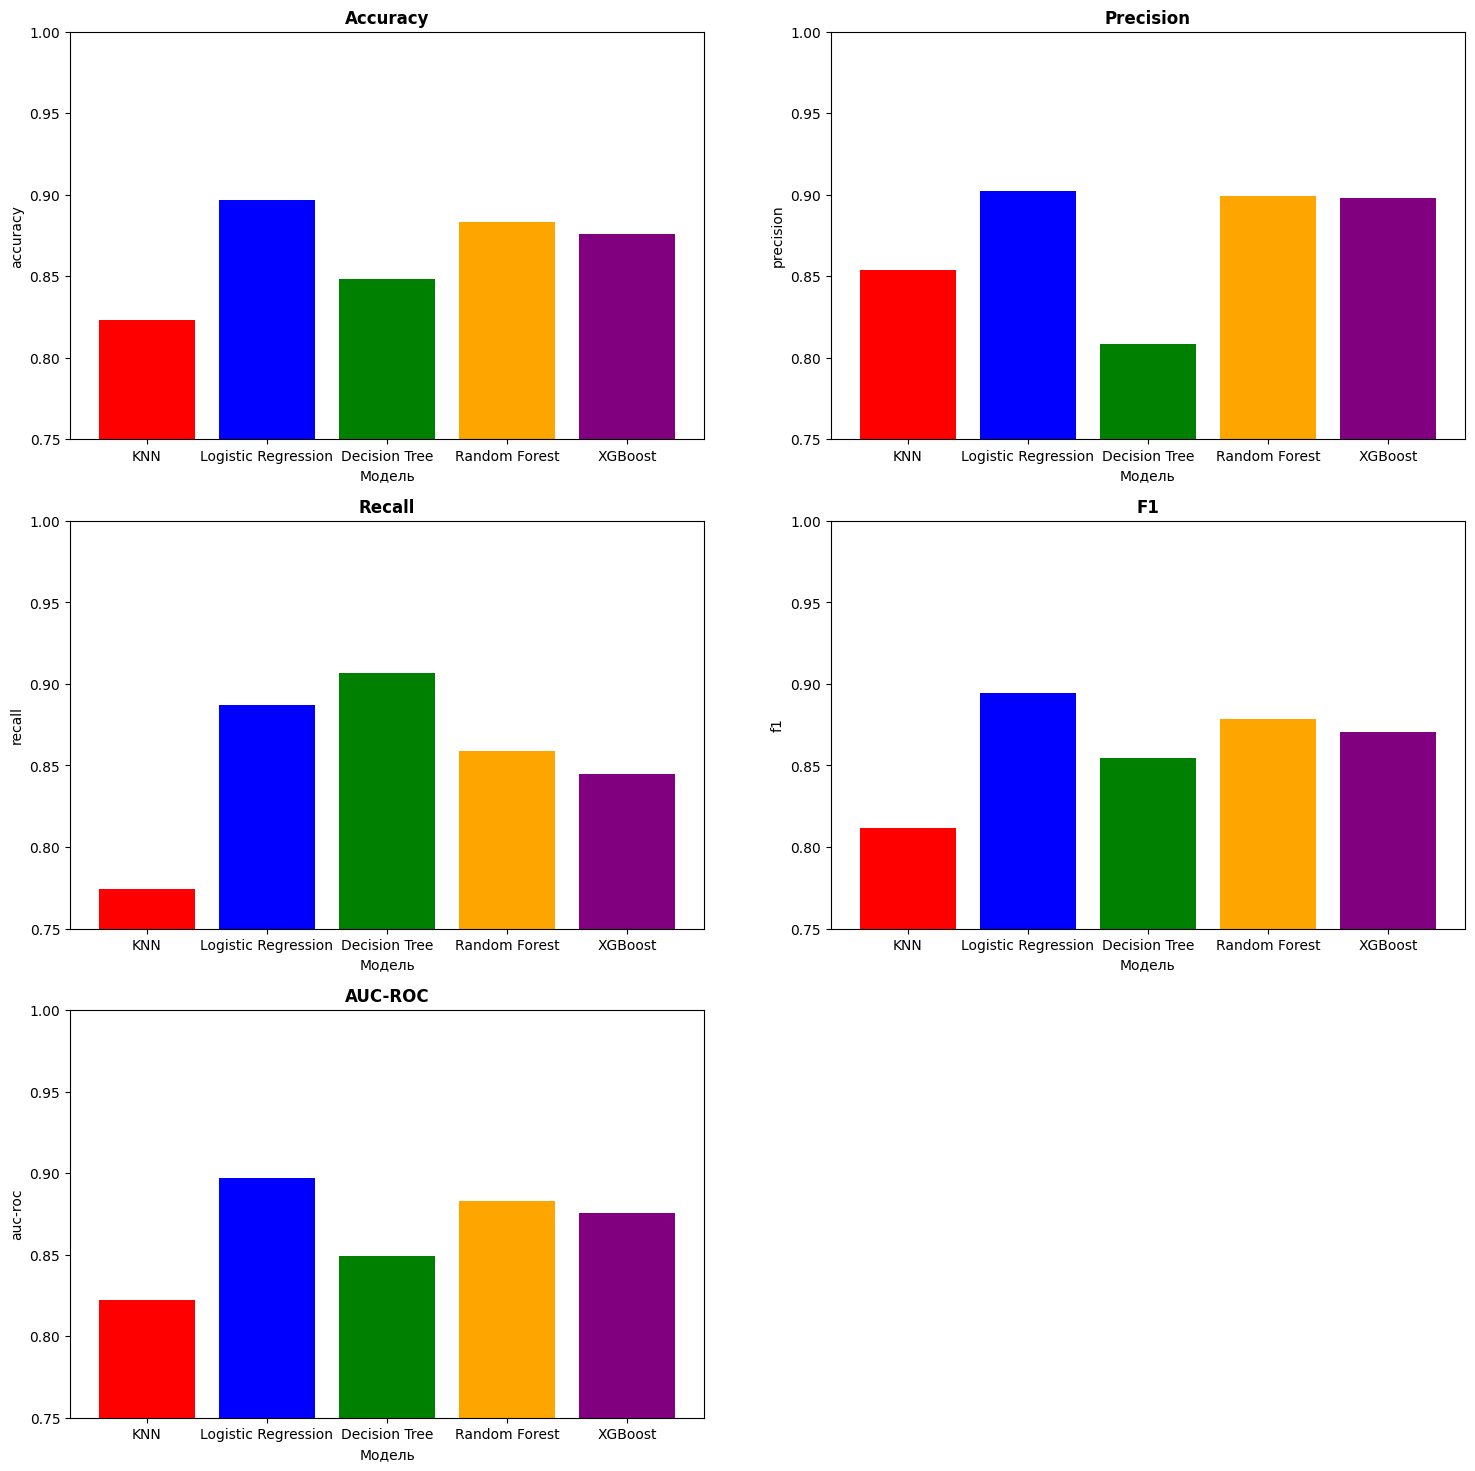

In [30]:
import matplotlib.pyplot as plt

models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
colors = ['red', 'blue', 'green', 'orange', 'purple']
gs = plt.GridSpec(2, 3, figure=plt.figure(figsize=(18, 18)))

plt.subplot(3, 2, 1)
plt.bar(models, np.array(acc_list) - 0.75, bottom = 0.75, color=colors)
plt.ylim(0.75, 1)
plt.title('Accuracy', weight='heavy')
plt.xlabel("Модель")
plt.ylabel("accuracy")

plt.subplot(3, 2, 2)
plt.bar(models, np.array(prec_list) - 0.75, bottom = 0.75, color=colors)
plt.ylim(0.75, 1)
plt.title('Precision', weight='heavy')
plt.xlabel("Модель")
plt.ylabel("precision")

plt.subplot(3, 2, 3)
plt.bar(models, np.array(rec_list) - 0.75, bottom = 0.75, color=colors)
plt.ylim(0.75, 1)
plt.title('Recall', weight='heavy')
plt.xlabel("Модель")
plt.ylabel("recall")

plt.subplot(3, 2, 4)
plt.bar(models, np.array(f1_list) - 0.75, bottom = 0.75, color=colors)
plt.ylim(0.75, 1)
plt.title('F1', weight='heavy')
plt.xlabel("Модель")
plt.ylabel("f1")

plt.subplot(3, 2, 5)
plt.bar(models, np.array(auc_list) - 0.75, bottom = 0.75, color=colors)
plt.ylim(0.75, 1)
plt.title('AUC-ROC', weight='heavy')
plt.xlabel("Модель")
plt.ylabel("auc-roc")
